In [21]:
%%capture
# If you're in Colab...
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [22]:
#: Import data into DataFrame [df].
import pandas as pd
import category_encoders as ce
import numpy as np

url_train = 'https://drive.google.com/uc?export=download&id=1tmYLQ1RwIgjI_d66PWnlXU-5D_VxtiQc'
df = pd.read_csv(url_train)
df = pd.read_csv(url_train, parse_dates=['Yr_Sold'], index_col='Yr_Sold')
### END DATA IMPORT

#Split single `df` into `X` and `y` [THE FEATURE MATRIX, AND THE TARGET... VECTOR?].

target = 'SalePrice'

y = df[target]
X = df.drop(columns=target)
### END SPLITTING

#Now - Split the `X` and `y` already sply into training, validation, and testing sets - Split single `df` into `X` and `y` based on the Year column.

mask = X.index.year  < 2009
X_train, y_train = X.loc[mask], y.loc[mask]
X_val, y_val = X.loc[~mask], y.loc[~mask]
### END TRAINING/VALIDATION/TEST SPLIT

### Calculate the baseline mean absolute error from the y_pred:

from sklearn.metrics import mean_absolute_error

#THIS IS ALSO WHERE THE y_pred is created: Look at other modules for different ways of doing this:

y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)
### END creation of the (OPTIONAL): ##print('Baseline MAE:', baseline_mae)


### IMPORT THE PIECES NEEDED FOR MAKING A PIPELINE FOR THE: RANDOM FOREST

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
### PLUG THE MODEL TYPE IN HERE: RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor


### MAKE A PIPELINE TO Build and train a: RANDOM FOREST model.
model_rf = make_pipeline(
    ce.TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
model_rf.fit(X_train, y_train);
scores = cross_val_score(model_rf, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

### RANDOM FOREST MODEL IS ABOVE

### Compare the TRAINING AND VALIDATION Model Metrics / MAE.
###MAKE SURE TO CHANGE THE model_(xx)_ designations for the columns below:
model_rf_training_mae = mean_absolute_error(y_train, model_rf.predict(X_train))
model_rf_validation_mae = mean_absolute_error(y_val, model_rf.predict(X_val))
model_rf_r2_score = model_rf.score(X_val, y_val)
###OPTIONAL TO print('Random Forest R^2:', model_lr_r2_score)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


MAE for 3 folds: [17960.63652083 18018.35578125 16822.37426042]


In [23]:
'''### GENERATE THE ARRAY OF PREDICTIONS = y_pred, for the test set below:
###Note: THIS IS IMPORTED AND CLEANED IN THE SAME WAY AS THE TRAINING/VAL SET.

url_test = 'https://drive.google.com/uc?export=download&id=1y9u8cOWprTjruw8E-ct1c7YaEytToqd_'
X_test = pd.read_csv(url_test)

X_test = pd.read_csv(url_test, parse_dates=['Yr_Sold'], index_col='Yr_Sold')
y_pred = model_r.predict(X_test)
print('My predictions:', y_pred[:3])'''


"### GENERATE THE ARRAY OF PREDICTIONS = y_pred, for the test set below:\n###Note: THIS IS IMPORTED AND CLEANED IN THE SAME WAY AS THE TRAINING/VAL SET.\n\nurl_test = 'https://drive.google.com/uc?export=download&id=1y9u8cOWprTjruw8E-ct1c7YaEytToqd_'\nX_test = pd.read_csv(url_test)\n\nX_test = pd.read_csv(url_test, parse_dates=['Yr_Sold'], index_col='Yr_Sold')\ny_pred = model_r.predict(X_test)\nprint('My predictions:', y_pred[:3])"

In [24]:
### THIS ONE IS DOING THE LINEAR MODEL SELECTKBEST
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#target = 'price'
#high_cardinality = ['display_address', 'street_address', 'description']
#features = df.columns.drop([target] + high_cardinality)
#X_train = df[features]
#y_train = df[target]

model_RidgeSK = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20), 
    Ridge(alpha=1.0)
)

k = 3
scores = cross_val_score(model_RidgeSK, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


MAE for 3 folds: [21532.11232542 23243.73235574 23366.76390753]


In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

model_RandSearchCV = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
model_RandSearchCV = RandomizedSearchCV(
    model_RandSearchCV, 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

model_RandSearchCV.fit(X_train, y_train);

print('Best hyperparameters', model_RandSearchCV.best_params_)
print('Cross-validation MAE', -model_RandSearchCV.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.5s finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Best hyperparameters {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.31838509642108515, 'randomforestregressor__n_estimators': 175, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 516}
Cross-validation MAE 17193.343458333333


In [31]:
##THIS IS THE DF DETAIL FROM ABOVE, IN A SEPARATE WINDOW FOR NO REASON... DON'T JUDGE ME.
##NOTE THE MODEL NAME: model_RandSearchCV
pd.DataFrame(model_RandSearchCV.cv_results_).sort_values(by='rank_test_score').T

,6,1,5,9,8,7,3,4,2,0
mean_fit_time,2.09533,5.2727,2.62736,2.48466,1.70779,1.10847,2.26966,1.12831,0.927042,0.695632
std_fit_time,0.0771139,0.0737327,0.063561,0.207281,0.0319004,0.0199148,0.0211857,0.0248196,0.0169644,0.00699367
mean_score_time,0.125169,0.154479,0.110873,0.102492,0.129639,0.076787,0.113222,0.109845,0.06635,0.0653
std_score_time,0.00256942,0.0122906,0.00909505,0.0191664,0.00444832,0.0030071,0.00768329,0.00157147,0.00478695,0.000587948
param_randomforestregressor__max_depth,15,20,15,10,15,5,5,None,5,5
param_randomforestregressor__max_features,0.329656,0.72099,0.65524,0.581734,0.138016,0.520217,0.637702,0.00742578,0.795791,0.222834
param_randomforestregressor__n_estimators,336,493,263,348,359,157,494,224,120,56
param_simpleimputer__strategy,mean,mean,mean,mean,median,median,median,median,median,median
param_targetencoder__min_samples_leaf,820,201,456,409,716,415,923,787,970,89
params,"{'randomforestregressor__max_depth': 15, 'rand...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 15, 'rand...","{'randomforestregressor__max_depth': 10, 'rand...","{'randomforestregressor__max_depth': 15, 'rand...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': 5, 'rando..."


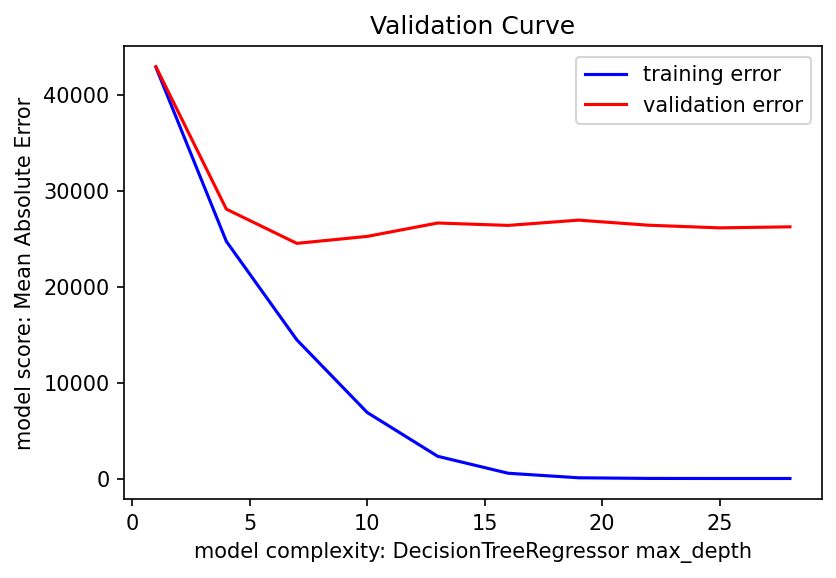

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: DecisionTreeRegressor max_depth')
plt.ylabel('model score: Mean Absolute Error')
plt.legend();